In [18]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### have some helper plot functions, which will be used later

In [19]:
# set the plot
def plot_points(points):
    plt.title('Points from data.csv')
    plt.xlabel('house-size')
    plt.ylabel('house-price')
    plt.grid()
    for p in points:
        plt.plot(p[0], p[1], 'ro')

def plot_line(m, c, points):
    ax = plt.gca()
    x = points[:,0] #get the x values of the points
    y = [m*i + c for i in x]
    plt.plot(x, y)
    

### define the cost function

Lets say we have a line,
y = mx + c
And a data point (x1, y1).
This point need not be on the line.
Hence, for above values of 'm' and 'c'
y1 != mx1 + c
We can make it equal by considering the error/deviation
y1 = mx1 + c + err
Hence, err = y1 - (mx1 + c).

So in short, that is waht we want minimize, err.

Before training, m = 0, c = 0, cost = 5565.10783448
Running the Linear regression model...


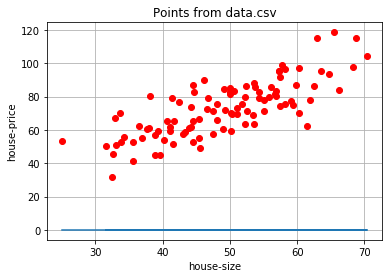

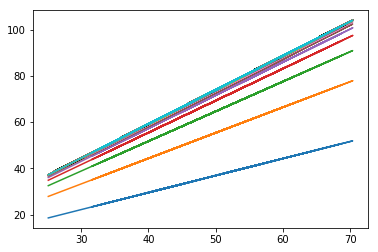

After training, m = 1.47774408519, c = 0.0889365199374, cost = 112.614810116


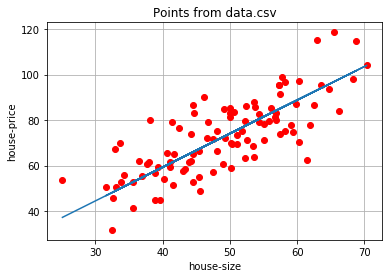

According to LinearRegression: Prediction for x = 67.0 : 99.0977902276


In [20]:
def cost(m, c, points):
    err = 0
    for p in points:
        xi = p[0]
        yi = p[1]
        err += (yi - (m*xi + c)) ** 2
    return err / (float(len(points)))


## main:
points = np.genfromtxt("data.csv", delimiter=",")
steps = 1000
m = 0
c = 0
N = float(len(points))
m_grad = 0
c_grad = 0
err = 0

print "Before training, m = {0}, c = {1}, cost = {2}".format(m, c, cost(m , c, points))
print "Running the Linear regression model..."

plot_points(points)
plot_line(m, c, points)
plt.show()


for i in range(steps):
    m_grad = 0
    c_grad = 0
    for p in points:
        xi = p[0]
        yi = p[1]
        m_grad += (2/N) * (yi - (m * xi + c)) * (-xi) 
        c_grad += (2/N) * (yi - (m * xi + c)) * (-1)
    m = m - (0.0001 * m_grad)
    c = c - (0.0001 * c_grad)
    plot_line(m, c, points)

plt.show()
print "After training, m = {0}, c = {1}, cost = {2}".format(m, c, cost(m , c, points))

plot_points(points)
plot_line(m, c, points)
plt.show()

predict_for = 67.0
print "According to LinearRegression: Prediction for x = {0} : {1}".format(predict_for, (m*predict_for + c))